In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [244]:
num_sample = 200
n_class = 8
mult_test = 0.25

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1600, 784) (1600,)
(400, 784) (400,)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [245]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [246]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((1600, 784), (1600,))

In [247]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((400, 784), (400,))

## PCA

In [248]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [249]:
num_component = 27
pca = PCA(n_components=num_component, svd_solver='full')

In [250]:
pca.fit(X_train)

PCA(n_components=27, svd_solver='full')

In [251]:
np.cumsum(pca.explained_variance_ratio_)

tensor([0.06598013, 0.11492047, 0.15803092, 0.19518663, 0.22648142,
        0.25275269, 0.27544559, 0.29570279, 0.3135786 , 0.33097014,
        0.34651892, 0.36118011, 0.37465359, 0.38739875, 0.39961056,
        0.41139389, 0.42252907, 0.43350089, 0.44429928, 0.45491315,
        0.46546446, 0.47564404, 0.48539271, 0.49500004, 0.50421844,
        0.51294498, 0.52150831], requires_grad=True)

In [252]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [253]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1600, 27) (1600,)
(400, 27) (400,)


## Norm

In [254]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

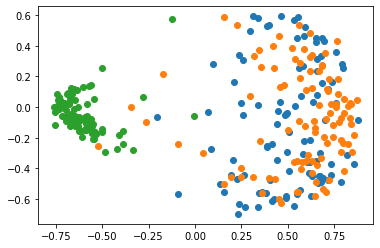

In [255]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

## Binary Rep

In [256]:
def dec2bin(y_class, n_qubit):
    temp = bin(y_class).replace('b', '')[1:]
    out = np.zeros((n_qubit,))
    
    if len(temp) > n_qubit:
        print("Number of qubit can't be lowered than the binary representation of the class decimal number.")
        return None
    elif len(temp) < n_qubit:
        for i in range(n_qubit-len(temp)):
            temp = '0' + temp
    
    for i in range(len(out)):
        out[i] = temp[i]
        
    return out

In [257]:
n_bit_rep = 3

Y_train_0 = np.zeros(Y_train.shape)
Y_train_1 = np.zeros(Y_train.shape)
Y_train_2 = np.zeros(Y_train.shape)

for i in range(len(Y_train)):
        Y_train_0[i] = dec2bin(Y_train[i], n_bit_rep)[0]
        Y_train_1[i] = dec2bin(Y_train[i], n_bit_rep)[1]
        Y_train_2[i] = dec2bin(Y_train[i], n_bit_rep)[2]
        
        
    
Y_test_0 = np.zeros(Y_test.shape)
Y_test_1 = np.zeros(Y_test.shape)
Y_test_2 = np.zeros(Y_test.shape)

for i in range(len(Y_test)):
        Y_test_0[i] = dec2bin(Y_test[i], n_bit_rep)[0]
        Y_test_1[i] = dec2bin(Y_test[i], n_bit_rep)[1]
        Y_test_2[i] = dec2bin(Y_test[i], n_bit_rep)[2]

In [258]:
Y_train.shape, Y_test.shape

((1600,), (400,))

In [259]:
Y_test_2

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

# Quantum

In [260]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [261]:
# Define output labels as quantum state vectors

# def density_matrix(state):
#     """Calculates the density matrix representation of a state.

#     Args:
#         state (array[complex]): array representing a quantum state vector

#     Returns:
#         dm: (array[complex]): array representing the density matrix
#     """
#     return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

state_labels = [label_0, label_1]
#state_labels = np.loadtxt('./tetra_states.txt', dtype=np.complex_)

In [262]:
dm_labels = [density_matrix(state_labels[i]) for i in range(2)]
len(dm_labels)

2

In [263]:
n_qubits = 2
dev_fc = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [264]:
X_train[0].shape

(27,)

In [265]:
a = np.random.uniform(size=(2, 1, 27))

q_fc(a, X_train[0])

tensor([0.86113783, 0.13886217], requires_grad=True)

In [266]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 2), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

In [357]:
n_components = 27

X = tf.keras.Input(shape=(n_components,), name='Input_Layer')


# Quantum FC Layer
num_fc_layer = 4
q_fc_layer_0 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_components)}, output_dim=2)(X)
q_fc_layer_1 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_components)}, output_dim=2)(X)
q_fc_layer_2 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_components)}, output_dim=2)(X)

# Alpha Layer
alpha_layer_0 = class_weights()(q_fc_layer_0)
alpha_layer_1 = class_weights()(q_fc_layer_1)
alpha_layer_2 = class_weights()(q_fc_layer_2)


model_0 = tf.keras.Model(inputs=X, outputs=alpha_layer_0)
model_1 = tf.keras.Model(inputs=X, outputs=alpha_layer_1)
model_2 = tf.keras.Model(inputs=X, outputs=alpha_layer_2)

In [358]:
model_0(X_train[0:32]), model_1(X_train[0:32]), model_2(X_train[0:32])

(<tf.Tensor: shape=(32, 2), dtype=float32, numpy=
 array([[-0.00616399, -0.03070424],
        [-0.00614906, -0.03062987],
        [-0.00640828, -0.03192108],
        [-0.0063947 , -0.03185343],
        [-0.00590221, -0.02940024],
        [-0.0062141 , -0.03095382],
        [-0.00594578, -0.02961727],
        [-0.0060147 , -0.02996057],
        [-0.00637253, -0.03174303],
        [-0.00632692, -0.03151582],
        [-0.0063427 , -0.03159443],
        [-0.00600935, -0.02993395],
        [-0.00634073, -0.03158462],
        [-0.0060937 , -0.03035413],
        [-0.00596747, -0.02972532],
        [-0.00619348, -0.03085114],
        [-0.00607994, -0.03028557],
        [-0.00586353, -0.02920758],
        [-0.00564657, -0.02812682],
        [-0.00639244, -0.03184222],
        [-0.00623861, -0.03107595],
        [-0.00602815, -0.03002757],
        [-0.00590423, -0.02941029],
        [-0.00602989, -0.03003626],
        [-0.00634798, -0.03162074],
        [-0.00596582, -0.02971709],
        [-0.00

In [359]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=int(len(X_train)/32),
    decay_rate=0.95,
    staircase=True)

In [360]:
for i in range(10):
    print(0.1* ((0.95)**i))

0.1
0.095
0.09025
0.0857375
0.081450625
0.07737809374999999
0.07350918906249998
0.06983372960937498
0.06634204312890622
0.0630249409724609


In [361]:
opt_0 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
opt_1 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
opt_2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


model_0.compile(opt_0, loss='mse', metrics=["accuracy"])
model_1.compile(opt_1, loss='mse', metrics=["accuracy"])
model_2.compile(opt_2, loss='mse', metrics=["accuracy"])

In [279]:
cp_val_acc = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_2_PCA_QFC_BinRep_val_acc.hdf5",
                monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

cp_val_loss = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_2_PCA_QFC_BinRep_val_loss.hdf5",
                monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [280]:
H_2 = model_2.fit(X_train, to_categorical(Y_train_2), epochs=10, batch_size=64, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test_2)), verbose=1,
              callbacks=[cp_val_acc, cp_val_loss])

Epoch 1/10
25/25 [==============================] - 4917s 197s/step - loss: 0.3579 - accuracy: 0.5284 - val_loss: 0.1996 - val_accuracy: 0.6975

Epoch 00001: val_accuracy improved from -inf to 0.69750, saving model to ./Model/8_2_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00001: val_loss improved from inf to 0.19960, saving model to ./Model/8_2_PCA_QFC_BinRep_val_loss.hdf5
Epoch 2/10
25/25 [==============================] - 4948s 198s/step - loss: 0.1209 - accuracy: 0.8441 - val_loss: 0.1024 - val_accuracy: 0.8725

Epoch 00002: val_accuracy improved from 0.69750 to 0.87250, saving model to ./Model/8_2_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00002: val_loss improved from 0.19960 to 0.10240, saving model to ./Model/8_2_PCA_QFC_BinRep_val_loss.hdf5
Epoch 3/10
25/25 [==============================] - 4941s 198s/step - loss: 0.0750 - accuracy: 0.9070 - val_loss: 0.0812 - val_accuracy: 0.8950

Epoch 00003: val_accuracy improved from 0.87250 to 0.89500, saving model to ./Model/8_2_PCA_QFC_BinRep_val_acc.h

In [313]:
model_2.load_weights('./Model/8_2_PCA_QFC_BinRep_val_acc.hdf5')

In [314]:
model_2.weights

[<tf.Variable 'model_43/keras_layer_33/params:0' shape=(2, 4, 27) dtype=float32, numpy=
 array([[[ 0.25238508, -1.283565  ,  1.4758877 ,  1.0936497 ,
           1.6707364 ,  0.04033105, -0.23157464, -0.74435776,
          -0.01216206,  0.12423605, -0.6545662 , -0.9702287 ,
           0.38811305,  0.02621555,  0.9926866 ,  1.2411599 ,
          -1.5134276 , -1.3260348 ,  0.6526208 , -0.07668146,
           0.5107885 , -0.0971964 , -0.25805223,  0.6784882 ,
          -0.33452755,  0.3223217 ,  0.8651965 ],
         [ 1.5939548 , -1.7591078 ,  1.0502827 , -0.9801683 ,
           0.23853745, -1.1927123 , -1.0582882 , -0.6004686 ,
           0.722694  , -1.3746912 , -1.2787397 ,  0.4410289 ,
           1.0183585 ,  0.19497451, -0.56488156,  0.3876605 ,
           0.5895367 ,  0.9255495 ,  0.31125093,  0.620908  ,
           0.27656588,  0.82624966, -0.84203106, -0.70228755,
          -0.2568844 , -0.65351015, -1.4243661 ],
         [ 1.4805379 ,  0.5782921 ,  1.1803944 ,  1.3369706 ,
      

In [283]:
H_2.history

{'loss': [0.2854771316051483,
  0.10520904511213303,
  0.07230360805988312,
  0.06191030517220497,
  0.05034208670258522,
  0.05369241163134575,
  0.04711979255080223,
  0.046486977487802505,
  0.04788347706198692,
  0.047786399722099304],
 'accuracy': [0.6006249785423279,
  0.8693749904632568,
  0.9125000238418579,
  0.9300000071525574,
  0.9418749809265137,
  0.9456250071525574,
  0.953125,
  0.9543750286102295,
  0.9524999856948853,
  0.9574999809265137],
 'val_loss': [0.19960369169712067,
  0.10240485519170761,
  0.08124461024999619,
  0.061885666102170944,
  0.06332631409168243,
  0.06206800788640976,
  0.0626944750547409,
  0.05547158792614937,
  0.05775770545005798,
  0.048971034586429596],
 'val_accuracy': [0.6974999904632568,
  0.8725000023841858,
  0.8949999809265137,
  0.9275000095367432,
  0.9325000047683716,
  0.9275000095367432,
  0.9350000023841858,
  0.9399999976158142,
  0.9375,
  0.9574999809265137]}

In [294]:
cp_val_acc = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_1_PCA_QFC_BinRep_val_acc.hdf5",
                monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

cp_val_loss = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_1_PCA_QFC_BinRep_val_loss.hdf5",
                monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [295]:
H_1 = model_1.fit(X_train, to_categorical(Y_train_1), epochs=10, batch_size=64, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test_1)), verbose=1,
              callbacks=[cp_val_acc, cp_val_loss])

Epoch 1/10
25/25 [==============================] - 5103s 204s/step - loss: 0.3477 - accuracy: 0.5750 - val_loss: 0.1877 - val_accuracy: 0.7675

Epoch 00001: val_accuracy improved from -inf to 0.76750, saving model to ./Model/8_1_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00001: val_loss improved from inf to 0.18765, saving model to ./Model/8_1_PCA_QFC_BinRep_val_loss.hdf5
Epoch 2/10
25/25 [==============================] - 5335s 214s/step - loss: 0.1795 - accuracy: 0.7362 - val_loss: 0.1576 - val_accuracy: 0.7950

Epoch 00002: val_accuracy improved from 0.76750 to 0.79500, saving model to ./Model/8_1_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00002: val_loss improved from 0.18765 to 0.15757, saving model to ./Model/8_1_PCA_QFC_BinRep_val_loss.hdf5
Epoch 3/10
25/25 [==============================] - 5174s 207s/step - loss: 0.1254 - accuracy: 0.8412 - val_loss: 0.1004 - val_accuracy: 0.8900

Epoch 00003: val_accuracy improved from 0.79500 to 0.89000, saving model to ./Model/8_1_PCA_QFC_BinRep_val_acc.h

In [298]:
H_1.history

{'loss': [0.2944835126399994,
  0.16260360181331635,
  0.11242345720529556,
  0.08996044099330902,
  0.09635312110185623,
  0.07557286322116852,
  0.07336161285638809,
  0.06519541889429092,
  0.059850968420505524,
  0.06976080685853958],
 'accuracy': [0.5918750166893005,
  0.7668750286102295,
  0.8581249713897705,
  0.8924999833106995,
  0.871874988079071,
  0.9131249785423279,
  0.9200000166893005,
  0.9325000047683716,
  0.9362499713897705,
  0.9212499856948853],
 'val_loss': [0.18765108287334442,
  0.15756896138191223,
  0.10040968656539917,
  0.10998449474573135,
  0.09204897284507751,
  0.09230255335569382,
  0.07991590350866318,
  0.061447035521268845,
  0.09571236371994019,
  0.07150525599718094],
 'val_accuracy': [0.7674999833106995,
  0.7950000166893005,
  0.8899999856948853,
  0.8500000238418579,
  0.8725000023841858,
  0.887499988079071,
  0.9150000214576721,
  0.9399999976158142,
  0.8949999809265137,
  0.9150000214576721]}

In [299]:
model_1.load_weights('./Model/8_1_PCA_QFC_BinRep_val_acc.hdf5')

In [300]:
model_1.weights

[<tf.Variable 'model_42/keras_layer_32/params:0' shape=(2, 4, 27) dtype=float32, numpy=
 array([[[ 2.13561803e-01,  7.04369843e-01, -7.41668046e-01,
          -2.47792912e+00, -7.35521019e-01,  2.42834067e+00,
          -2.29163289e+00, -7.02798665e-02,  2.77989686e-01,
          -1.87277973e+00, -9.62997615e-01, -2.47386526e-02,
          -1.57331479e+00,  1.47493351e+00, -9.08603251e-01,
          -1.70755178e-01,  1.47408926e+00, -4.73341011e-02,
           8.03774416e-01, -1.31202328e+00, -3.04269016e-01,
          -3.45121711e-01, -5.06858587e-01,  9.85353649e-01,
           6.53059006e-01,  2.31403902e-01, -6.72540545e-01],
         [ 1.91255665e+00,  4.48507041e-01, -2.73740029e+00,
          -1.01107252e+00,  2.98072875e-01, -2.76256895e+00,
           5.40756583e-01,  1.89853477e+00, -1.96850085e+00,
           4.61575985e-01,  6.75956607e-01,  1.15147948e+00,
           5.28609276e-01,  9.84429836e-01, -5.55440485e-01,
           7.53358781e-01, -6.32270455e-01,  2.37090215e-

In [296]:
cp_val_acc = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_0_PCA_QFC_BinRep_val_acc.hdf5",
                monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True, mode='max')

cp_val_loss = tf.keras.callbacks.ModelCheckpoint(filepath="./Model/8_0_PCA_QFC_BinRep_val_loss.hdf5",
                monitor='val_loss', verbose=1, save_weights_only=True, save_best_only=True, mode='min')

In [297]:
H_0 = model_0.fit(X_train, to_categorical(Y_train_0), epochs=10, batch_size=64, initial_epoch=0,
              validation_data=(X_test, to_categorical(Y_test_0)), verbose=1,
              callbacks=[cp_val_acc, cp_val_loss])

# batch size = 32 give 0.9175 val acc

Epoch 1/10
25/25 [==============================] - 5154s 206s/step - loss: 0.3509 - accuracy: 0.5156 - val_loss: 0.1529 - val_accuracy: 0.7900

Epoch 00001: val_accuracy improved from -inf to 0.79000, saving model to ./Model/8_0_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00001: val_loss improved from inf to 0.15292, saving model to ./Model/8_0_PCA_QFC_BinRep_val_loss.hdf5
Epoch 2/10
25/25 [==============================] - 5150s 206s/step - loss: 0.1257 - accuracy: 0.8337 - val_loss: 0.1100 - val_accuracy: 0.8650

Epoch 00002: val_accuracy improved from 0.79000 to 0.86500, saving model to ./Model/8_0_PCA_QFC_BinRep_val_acc.hdf5

Epoch 00002: val_loss improved from 0.15292 to 0.10996, saving model to ./Model/8_0_PCA_QFC_BinRep_val_loss.hdf5
Epoch 3/10
25/25 [==============================] - 5201s 208s/step - loss: 0.0853 - accuracy: 0.8889 - val_loss: 0.0715 - val_accuracy: 0.9075

Epoch 00003: val_accuracy improved from 0.86500 to 0.90750, saving model to ./Model/8_0_PCA_QFC_BinRep_val_acc.h

In [301]:
H_0.history

{'loss': [0.2629517614841461,
  0.11833358556032181,
  0.07571955770254135,
  0.06652862578630447,
  0.0701732337474823,
  0.0659039169549942,
  0.060496874153614044,
  0.057440683245658875,
  0.057736776769161224,
  0.057137031108140945],
 'accuracy': [0.6225000023841858,
  0.8475000262260437,
  0.90625,
  0.9237499833106995,
  0.9237499833106995,
  0.9212499856948853,
  0.9306250214576721,
  0.9399999976158142,
  0.9318749904632568,
  0.9418749809265137],
 'val_loss': [0.1529213786125183,
  0.10995673388242722,
  0.07145961374044418,
  0.0905812457203865,
  0.07090241461992264,
  0.07480426132678986,
  0.06753731518983841,
  0.06791282445192337,
  0.0768318846821785,
  0.08787401020526886],
 'val_accuracy': [0.7900000214576721,
  0.8650000095367432,
  0.9075000286102295,
  0.8774999976158142,
  0.9200000166893005,
  0.925000011920929,
  0.9275000095367432,
  0.9150000214576721,
  0.8924999833106995,
  0.9049999713897705]}

In [302]:
model_0.load_weights('./Model/8_0_PCA_QFC_BinRep_val_acc.hdf5')

In [303]:
model_0.weights

[<tf.Variable 'model_41/keras_layer_31/params:0' shape=(2, 4, 27) dtype=float32, numpy=
 array([[[ 2.43155330e-01,  6.09896839e-01, -1.27261996e+00,
          -1.86509117e-01, -8.14169049e-01,  6.70577049e-01,
           1.01701581e+00, -3.93057466e-01,  2.18859267e+00,
          -1.26494753e+00,  1.28049088e+00, -3.69921565e-01,
          -6.75701320e-01, -1.71861067e-01,  1.11157024e+00,
           2.38845921e+00,  3.84969741e-01,  1.24507856e+00,
          -3.10823011e+00, -5.62885761e-01,  1.90875149e+00,
           2.45723978e-01, -2.04274106e+00, -1.08313549e+00,
          -1.39105642e+00, -3.37367564e-01, -2.23770559e-01],
         [-1.84766844e-01, -1.12252903e+00,  9.71584678e-01,
          -2.03230873e-01,  1.58058965e+00, -1.64615381e+00,
           1.00719643e+00,  2.88049430e-01, -2.48440638e-01,
           3.61194193e-01,  1.41994298e+00,  2.73416657e-02,
           1.72406542e+00, -5.17640650e-01, -1.37900710e-01,
           1.20263696e+00,  1.43566275e+00,  8.61111224e-

In [ ]:
# best



In [315]:
result_0 = np.argmax(model_0.predict(X_test), axis=1)
result_1 = np.argmax(model_1.predict(X_test), axis=1)
result_2 = np.argmax(model_2.predict(X_test), axis=1)

In [316]:
print((result_0 == Y_test_0).sum()/len(Y_test_0))
print((result_1 == Y_test_1).sum()/len(Y_test_1))
print((result_2 == Y_test_2).sum()/len(Y_test_2))

0.9275
0.94
0.9575


In [319]:
result = np.concatenate((result_0.reshape(-1,1), result_1.reshape(-1,1), result_2.reshape(-1,1)), axis=1)
Y_all = np.concatenate((Y_test_0.reshape(-1,1), Y_test_1.reshape(-1,1), Y_test_2.reshape(-1,1)), axis=1)

In [328]:
1 - ((np.sum(result == Y_all, axis=1) < 3).sum()/len(Y_all))

tensor(0.8625, requires_grad=True)

In [332]:
1 - (3 - 0.9275 - 0.94 - 0.9575)

0.8250000000000002

In [329]:
result_0 = np.argmax(model_0.predict(X_train), axis=1)
result_1 = np.argmax(model_1.predict(X_train), axis=1)
result_2 = np.argmax(model_2.predict(X_train), axis=1)

In [330]:
print((result_0 == Y_train_0).sum()/len(Y_train_0))
print((result_1 == Y_train_1).sum()/len(Y_train_1))
print((result_2 == Y_train_2).sum()/len(Y_train_2))

0.941875
0.94
0.96375


In [331]:
result = np.concatenate((result_0.reshape(-1,1), result_1.reshape(-1,1), result_2.reshape(-1,1)), axis=1)
Y_all = np.concatenate((Y_train_0.reshape(-1,1), Y_train_1.reshape(-1,1), Y_train_2.reshape(-1,1)), axis=1)

In [333]:
1 - ((np.sum(result == Y_all, axis=1) < 3).sum()/len(Y_all))

tensor(0.8775, requires_grad=True)

In [334]:
1 - (3 - 0.941875 - 0.94 - 0.96375)

0.845625

In [335]:
model_0.summary()

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 27)]              0         
_________________________________________________________________
keras_layer_31 (KerasLayer)  (None, 2)                 216       
_________________________________________________________________
class_weights_31 (class_weig (None, 2)                 2         
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________


# Exploring the results

In [367]:
QFC_weights_0 = np.array([[[ 2.43155330e-01,  6.09896839e-01, -1.27261996e+00,
          -1.86509117e-01, -8.14169049e-01,  6.70577049e-01,
           1.01701581e+00, -3.93057466e-01,  2.18859267e+00,
          -1.26494753e+00,  1.28049088e+00, -3.69921565e-01,
          -6.75701320e-01, -1.71861067e-01,  1.11157024e+00,
           2.38845921e+00,  3.84969741e-01,  1.24507856e+00,
          -3.10823011e+00, -5.62885761e-01,  1.90875149e+00,
           2.45723978e-01, -2.04274106e+00, -1.08313549e+00,
          -1.39105642e+00, -3.37367564e-01, -2.23770559e-01],
         [-1.84766844e-01, -1.12252903e+00,  9.71584678e-01,
          -2.03230873e-01,  1.58058965e+00, -1.64615381e+00,
           1.00719643e+00,  2.88049430e-01, -2.48440638e-01,
           3.61194193e-01,  1.41994298e+00,  2.73416657e-02,
           1.72406542e+00, -5.17640650e-01, -1.37900710e-01,
           1.20263696e+00,  1.43566275e+00,  8.61111224e-01,
          -1.18519020e+00,  5.03529131e-01,  7.93058634e-01,
           2.82600343e-01,  8.59408557e-01, -1.05712855e+00,
          -6.55896902e-01,  7.82682061e-01,  2.96213746e-01],
         [-7.36695468e-01, -6.14892066e-01, -9.66201246e-01,
           1.53003061e+00, -2.93684304e-01, -1.18612242e+00,
           1.43026137e+00,  8.21835324e-02, -7.71349490e-01,
           1.20452225e+00, -8.49828660e-01,  2.25557280e+00,
           5.96706092e-01,  1.26949893e-02, -1.56969205e-03,
           1.34492815e+00, -7.67667294e-01,  6.34720266e-01,
          -9.43942547e-01,  3.23576748e-01, -1.19241714e+00,
           5.92457056e-01,  9.79382265e-03, -3.97607803e-01,
           1.36605883e+00,  1.67596295e-01,  2.99539357e-01],
         [ 3.67715001e-01, -4.67912763e-01,  5.31973839e-01,
          -1.02696225e-01, -1.34298491e+00,  1.58296692e+00,
          -2.47333360e+00, -3.70748490e-01,  1.19265890e+00,
          -2.22973680e+00,  6.11613691e-01,  6.77477717e-01,
           1.78986561e+00,  6.72390282e-01,  1.25609756e-01,
           1.47323358e+00,  2.29580855e+00,  2.41118670e-01,
          -1.73571897e+00, -4.19726551e-01,  7.27503479e-01,
           2.51843286e+00,  4.33269441e-01, -1.20464158e+00,
          -3.17003280e-01, -1.45686686e-01,  1.20392300e-01]],
 
        [[-2.55990792e-02,  1.24978542e-01, -2.55456388e-01,
          -4.47627395e-01, -2.05702677e-01,  3.15912396e-01,
           2.11443231e-01,  1.39556929e-01, -3.53635587e-02,
          -5.06321788e-01,  1.19341969e-01, -2.15996355e-02,
           1.49953455e-01, -4.87423763e-02,  3.37369025e-01,
           2.06812650e-01,  2.15889290e-01,  1.42025158e-01,
           8.44508559e-02, -3.01371425e-01, -2.19780907e-01,
           2.92048097e-01, -2.45437905e-01,  9.55259427e-02,
           3.51495385e-01, -7.85497129e-01,  1.97364151e-01],
         [-1.81108072e-01, -3.26251566e-01,  1.21880539e-01,
           7.11045340e-02, -5.80964863e-01,  8.23847204e-03,
          -2.55169034e-01, -4.30582374e-01,  2.14957749e-03,
           3.40030670e-01,  1.28438860e-01, -1.24942148e-02,
           3.50891948e-01, -5.14260590e-01, -8.41903463e-02,
          -5.83363064e-02, -1.61754355e-01,  4.50012922e-01,
          -4.30444926e-02, -6.15524888e-01, -6.15323782e-02,
          -3.12538184e-02, -4.14647907e-01, -2.93050800e-02,
          -5.73276162e-01, -4.09867883e-01, -2.36463115e-01],
         [-5.01628995e-01,  1.36054695e-01,  1.43330336e-01,
          -2.62918591e-01, -3.34000558e-01,  1.58802390e-01,
           4.20358837e-01, -7.29428291e-01, -2.53585339e-01,
          -1.14754573e-01, -4.14426774e-01,  1.73960999e-02,
           8.89504179e-02, -1.48225620e-01,  2.17984542e-01,
           2.59946108e-01, -3.96530181e-02, -3.16972882e-01,
           9.89291891e-02, -1.04558006e-01, -4.39525872e-01,
          -2.70598561e-01, -5.42935431e-01, -3.20877075e-01,
           1.19404696e-01, -1.05454051e+00, -2.33964279e-01],
         [ 3.49343084e-02, -8.87725592e-01, -1.97285622e-01,
           2.89767146e-01, -5.89697897e-01, -8.95340368e-02,
          -2.68346369e-01,  9.56423134e-02,  1.34971946e-01,
           9.18945894e-02,  2.45881639e-02, -1.07951820e-01,
          -2.64240265e-01, -7.91583359e-02, -4.85101700e-01,
          -8.03646386e-01,  5.35085090e-02, -3.31298023e-01,
          -6.15617394e-01,  1.27957374e-01, -4.62341130e-01,
          -6.30486727e-01, -1.02509007e-01, -5.49254179e-01,
          -2.80682832e-01,  3.09071839e-02,  8.24375600e-02]]])


QFC_weights_1 =  np.array([[[ 2.13561803e-01,  7.04369843e-01, -7.41668046e-01,
          -2.47792912e+00, -7.35521019e-01,  2.42834067e+00,
          -2.29163289e+00, -7.02798665e-02,  2.77989686e-01,
          -1.87277973e+00, -9.62997615e-01, -2.47386526e-02,
          -1.57331479e+00,  1.47493351e+00, -9.08603251e-01,
          -1.70755178e-01,  1.47408926e+00, -4.73341011e-02,
           8.03774416e-01, -1.31202328e+00, -3.04269016e-01,
          -3.45121711e-01, -5.06858587e-01,  9.85353649e-01,
           6.53059006e-01,  2.31403902e-01, -6.72540545e-01],
         [ 1.91255665e+00,  4.48507041e-01, -2.73740029e+00,
          -1.01107252e+00,  2.98072875e-01, -2.76256895e+00,
           5.40756583e-01,  1.89853477e+00, -1.96850085e+00,
           4.61575985e-01,  6.75956607e-01,  1.15147948e+00,
           5.28609276e-01,  9.84429836e-01, -5.55440485e-01,
           7.53358781e-01, -6.32270455e-01,  2.37090215e-01,
          -3.65454331e-02,  2.04081342e-01,  4.53795612e-01,
           1.01887858e+00,  1.96423754e-03,  5.65176070e-01,
          -4.10666466e-01, -1.74742088e-01, -1.62265420e-01],
         [ 1.36360085e+00, -1.53756058e+00,  1.47258782e+00,
           3.04700685e+00,  1.18540001e+00, -6.41015053e-01,
           1.37487292e+00,  3.81245941e-01,  1.08337313e-01,
          -1.23865497e+00,  4.39883113e-01,  7.91129589e-01,
           7.27589130e-01, -1.34648335e+00,  1.92124307e+00,
          -1.28628492e-01,  6.37319326e-01, -5.38911223e-01,
          -1.48334742e+00,  2.24371497e-02, -6.65140748e-01,
           2.17974916e-01,  4.82839853e-01, -6.11905992e-01,
           1.52840734e-01, -6.30289257e-01,  6.89226985e-01],
         [ 4.18222010e-01,  9.88358706e-02, -1.99718654e+00,
           1.57420814e+00,  2.15461552e-01,  6.74749911e-03,
          -1.44543755e+00, -5.11128783e-01,  9.50636029e-01,
           5.43830156e-01, -4.69606042e-01, -7.12640643e-01,
          -7.38102853e-01, -1.16969287e+00,  1.99917436e+00,
           1.60150707e+00,  6.38269365e-01,  8.37425530e-01,
          -1.91848755e-01, -7.62752146e-02, -6.35098636e-01,
           1.73193097e+00, -8.41753483e-02,  7.78824314e-02,
          -2.63326824e-01, -5.86004257e-01,  2.61479408e-01]],
 
        [[ 2.04339892e-01,  4.83131148e-02,  7.08388209e-01,
           1.23199916e+00, -1.57691419e-01,  4.04596537e-01,
           3.51291835e-01, -2.09155902e-01,  7.22112283e-02,
           2.12243572e-01,  1.38608232e-01, -3.88999097e-02,
          -4.13588481e-03, -2.02697307e-01,  3.75157446e-01,
           1.33023456e-01, -1.51307613e-01,  2.18176991e-01,
           2.44312659e-01, -7.00950325e-01,  1.40473247e-01,
           2.83694677e-02, -6.84125125e-01, -1.40360385e-01,
          -1.04750395e-02, -6.60943031e-01,  2.60479093e-01],
         [ 3.52862738e-02, -1.32135105e+00, -4.44280095e-02,
           2.60653883e-01, -7.81865776e-01, -3.49414736e-01,
           2.24076942e-01, -2.47330949e-01,  1.99313909e-01,
          -2.63107195e-02,  2.53654838e-01, -9.20381248e-02,
          -1.84706658e-01,  2.61187375e-01,  2.44364798e-01,
          -5.18465415e-03,  3.46821696e-01, -1.18699409e-01,
           2.60794401e-01, -6.11011907e-02,  3.70092183e-01,
           3.73037457e-01,  1.08811550e-01,  1.67358264e-01,
           5.10703623e-01,  2.31072739e-01,  1.51262909e-01],
         [ 3.01454902e-01,  4.08118963e-01, -2.21793354e-01,
          -7.77120516e-02,  3.03981896e-03,  2.92164177e-01,
           2.06238121e-01,  1.96191385e-01,  2.39537835e-01,
           4.02426034e-01,  4.01236027e-01,  1.40337702e-02,
           1.72683716e-01,  7.92212188e-02, -4.74936008e-01,
          -4.98669803e-01,  1.02664672e-01, -3.17277551e-01,
          -2.99901903e-01, -1.18644878e-01, -9.00180265e-02,
          -2.08723351e-01,  1.54371724e-01,  4.88565080e-02,
          -3.32386434e-01,  6.67890720e-03,  2.29531288e-01],
         [ 8.67671967e-02,  2.68156696e-02, -2.42526650e-01,
          -2.79513150e-01,  1.89668342e-01,  2.61452019e-01,
           1.38238683e-01, -1.19429141e-01,  8.72376338e-02,
           1.70015059e-02, -1.24053873e-01,  1.90764666e-01,
          -4.02729772e-02,  1.99198145e-02,  2.89305091e-01,
          -1.03046291e-01,  3.18677612e-02, -2.96460778e-01,
          -2.97945112e-01, -2.62596965e-01, -3.43904197e-01,
          -2.21060023e-01,  6.47366047e-02, -4.96322393e-01,
          -4.81373459e-01, -7.40604401e-02,  7.49188885e-02]]])


QFC_weights_2 = np.array([[[ 0.25238508, -1.283565  ,  1.4758877 ,  1.0936497 ,
           1.6707364 ,  0.04033105, -0.23157464, -0.74435776,
          -0.01216206,  0.12423605, -0.6545662 , -0.9702287 ,
           0.38811305,  0.02621555,  0.9926866 ,  1.2411599 ,
          -1.5134276 , -1.3260348 ,  0.6526208 , -0.07668146,
           0.5107885 , -0.0971964 , -0.25805223,  0.6784882 ,
          -0.33452755,  0.3223217 ,  0.8651965 ],
         [ 1.5939548 , -1.7591078 ,  1.0502827 , -0.9801683 ,
           0.23853745, -1.1927123 , -1.0582882 , -0.6004686 ,
           0.722694  , -1.3746912 , -1.2787397 ,  0.4410289 ,
           1.0183585 ,  0.19497451, -0.56488156,  0.3876605 ,
           0.5895367 ,  0.9255495 ,  0.31125093,  0.620908  ,
           0.27656588,  0.82624966, -0.84203106, -0.70228755,
          -0.2568844 , -0.65351015, -1.4243661 ],
         [ 1.4805379 ,  0.5782921 ,  1.1803944 ,  1.3369706 ,
           1.1923565 , -0.8520251 ,  1.6142409 , -1.3407493 ,
          -0.0224105 , -0.56530684,  0.74673027,  0.09010798,
          -0.15470746, -1.0716372 , -0.24121143, -0.06950819,
           0.8861834 , -1.0120331 ,  1.6633034 , -1.0660903 ,
           1.1489153 ,  0.19870222,  0.39089805, -1.2592713 ,
           0.40117478,  0.25680915, -0.47385713],
         [ 0.6816693 , -0.8193629 ,  0.3515519 , -1.5145577 ,
          -1.345594  , -0.03347336,  1.1329334 ,  0.32284987,
           0.69572586, -0.22648515, -0.2967536 , -0.24852224,
          -0.06209766, -0.6052295 ,  0.05322878,  0.7002158 ,
           0.6789426 , -0.08089218,  1.597369  ,  0.42995948,
          -2.065793  , -1.8819402 , -0.96567166,  0.7008939 ,
           0.31024018,  0.0143203 , -0.03012915]],
 
        [[-0.26043844, -1.2671397 , -0.7665562 , -0.73454547,
          -0.42687955, -0.79005   , -0.57044035,  0.5670234 ,
          -0.559065  , -0.8337233 ,  1.013581  , -0.02374453,
           0.03969347,  0.86406994,  0.28789476,  0.68236756,
          -0.36544892,  0.20712064,  0.13319191,  0.60051477,
           1.0777447 ,  0.50482   ,  0.336632  ,  0.6373108 ,
           0.77764106,  0.40643722,  0.99333715],
         [ 1.1036165 ,  0.6670855 ,  0.67230606,  0.8417209 ,
           0.6456138 ,  0.36344486,  0.4842049 ,  0.3734067 ,
           0.4754484 ,  0.3984084 ,  0.5505004 ,  0.2962076 ,
           0.35596478,  0.90170497,  0.6515702 ,  0.7272806 ,
           0.2928053 ,  0.54658663,  0.86133146,  0.11383731,
           0.66123146,  0.9329444 ,  0.2791378 ,  0.943679  ,
           0.37846708,  0.3151309 ,  0.93080616],
         [ 0.3823371 ,  0.5620422 ,  0.55613446,  0.52434295,
           0.43008015,  0.7603879 ,  0.6435362 ,  1.019311  ,
           0.5060591 ,  0.46195886,  0.08382669,  0.49996784,
           0.4807167 , -0.15241747,  0.77641803,  0.9427268 ,
           0.34767705,  0.09356961,  0.5384434 ,  0.8822416 ,
           0.38823062,  0.41094044,  0.59441495,  0.35334036,
           0.3434653 ,  0.64545953,  0.55594206],
         [ 0.58141035, -0.5284905 , -0.00234824,  0.5088091 ,
          -0.6456302 ,  0.25684038,  0.05738287, -0.22091906,
           0.1332204 ,  0.22355305, -0.6197434 ,  0.07781659,
           0.24501814, -0.42512515,  0.44368127,  0.44276303,
          -0.79923046,  0.54066217,  0.03367746, -0.27332   ,
           0.16291821,  0.27121952, -0.016491  ,  0.5335153 ,
           0.6548672 , -0.42493576, -0.25305215]]])


random_weights_0 = np.array([[[-0.0814448 , -0.0682026 , -0.00755903, -0.12436734,
         -0.24872363, -0.05575097, -0.15636982,  0.04399487,
          0.2591681 ,  0.19628912,  0.22436398,  0.14451694,
         -0.08223878,  0.06619811, -0.23818642, -0.06278777,
         -0.10698289,  0.29463083, -0.15356913,  0.15788338,
          0.0624142 , -0.01754352,  0.23007995,  0.30018407,
          0.06724864,  0.05337718, -0.06386404],
        [ 0.07806101,  0.11304128, -0.3032706 , -0.25230235,
         -0.28279942,  0.11691859,  0.00037372,  0.22104734,
         -0.03801072,  0.21831167,  0.19704431,  0.04963428,
         -0.04685354, -0.2497513 , -0.00971335,  0.03861296,
         -0.09128986, -0.13773088,  0.16975665,  0.08700842,
         -0.01189345, -0.25197244, -0.04733178, -0.23213992,
         -0.18479432,  0.03085011,  0.06458288],
        [ 0.04609659, -0.04290235, -0.20575437,  0.02378297,
          0.19994521,  0.27456075, -0.05183724,  0.22004843,
          0.07123786, -0.0813693 , -0.18109576, -0.22145088,
          0.24069387, -0.22842732, -0.27208018,  0.30459887,
          0.03323263, -0.2858605 ,  0.05749732, -0.09884052,
          0.25213784, -0.1528227 , -0.26010656,  0.21343273,
         -0.03937691, -0.18732333,  0.18692243],
        [ 0.09262669,  0.0367265 ,  0.13278487, -0.09732459,
         -0.14192364, -0.15479818,  0.25930023,  0.09780395,
         -0.02896422,  0.26710767, -0.00078493, -0.20432706,
         -0.01044992,  0.05640742,  0.05805343,  0.15383697,
         -0.1601611 ,  0.14948088,  0.16652462, -0.07463686,
         -0.24243614,  0.19254398,  0.08133903,  0.18900931,
          0.2581601 ,  0.01653424,  0.00489587]],

       [[-0.20726095, -0.1510506 , -0.1507198 ,  0.15816292,
         -0.2331805 , -0.19833684, -0.2367804 , -0.25760064,
          0.08565542, -0.02369049,  0.00416672, -0.06211448,
          0.12952703, -0.19807857, -0.29592657, -0.26973787,
          0.10546622, -0.10263699, -0.09446242, -0.2747408 ,
          0.07480487,  0.20175087,  0.29891497,  0.1889652 ,
          0.02389875,  0.14369848, -0.11020337],
        [-0.07649791,  0.19726133, -0.12303148,  0.05648011,
         -0.20464295, -0.10964769, -0.07044835,  0.26632828,
         -0.06965527, -0.20329732,  0.16326031, -0.1580036 ,
          0.10030296, -0.01962492,  0.20333987, -0.13097872,
         -0.29573968,  0.02410641, -0.29276842, -0.15634088,
          0.00569201, -0.17017488, -0.09346382,  0.1762909 ,
         -0.1278081 , -0.23337667,  0.18747589],
        [ 0.00576171, -0.16355   ,  0.2843457 , -0.12214695,
         -0.21935718,  0.2423352 ,  0.27079815,  0.277148  ,
         -0.05928567,  0.08892271, -0.00342882, -0.2837665 ,
         -0.22894569,  0.00414789, -0.19574293,  0.21095634,
         -0.13080858,  0.28402042, -0.07186259, -0.29715043,
         -0.15730493, -0.19805826,  0.29170734,  0.19095397,
         -0.04366904,  0.02983245,  0.11215207],
        [ 0.15280417,  0.11095676,  0.07704073, -0.21633947,
          0.29569155, -0.23984624, -0.10021502,  0.23224789,
         -0.03703371,  0.17327327,  0.04021043,  0.05981249,
         -0.09795925, -0.290584  , -0.20436874,  0.15439516,
          0.10748577,  0.06089634, -0.09778836,  0.18490395,
         -0.28673747,  0.1467652 , -0.05168369,  0.01081252,
          0.10434633, -0.2552334 , -0.16139436]]])


random_weights_1 = np.array([[[-2.46669233e-01,  1.66254342e-01, -1.62937880e-01,
          1.38210595e-01,  4.69605625e-02, -6.47487938e-02,
         -7.55115449e-02, -1.57993659e-01, -2.53705323e-01,
          4.08389866e-02, -2.10527927e-01, -1.18377924e-01,
         -1.03860021e-01,  1.55987740e-02, -1.94319353e-01,
         -2.77515799e-01, -5.97076118e-02,  1.47948802e-01,
          3.93781662e-02, -3.80211174e-02,  2.44643450e-01,
          1.17658347e-01,  2.67350316e-01,  7.13811517e-02,
          6.31961226e-03,  1.05653495e-01, -1.22028425e-01],
        [ 1.28849059e-01,  2.30817854e-01, -2.33140588e-02,
          2.38720298e-01, -2.65192688e-02,  2.04818726e-01,
         -2.75731146e-01, -2.06777960e-01, -2.94266105e-01,
         -1.07544944e-01,  1.53785795e-01, -1.84089646e-01,
          1.97769284e-01, -2.75001019e-01, -1.81310177e-02,
         -1.71873868e-01,  2.80198336e-01,  2.61329532e-01,
         -3.25763822e-02, -2.46484846e-01, -3.53026092e-02,
         -2.19302356e-01, -9.00464952e-02,  4.43051755e-02,
          2.74758935e-02, -1.31966129e-01,  2.15500712e-01],
        [-3.01397115e-01,  2.70664632e-01, -6.86812848e-02,
          3.10839653e-01,  5.82686067e-02, -1.83643445e-01,
          9.43903327e-02, -8.99898410e-02, -4.53620255e-02,
          1.37893081e-01,  8.77676606e-02,  1.60389096e-01,
         -1.38254881e-01,  9.31138098e-02, -6.08628094e-02,
          1.73738092e-01,  2.90800989e-01,  1.93061471e-01,
          1.32757664e-01,  2.62591004e-01,  1.35249883e-01,
         -6.76293522e-02, -9.03439224e-02, -7.88988918e-02,
          7.45030046e-02, -1.79019570e-03, -1.75871402e-01],
        [-6.46541566e-02,  1.34260833e-01, -3.02227646e-01,
         -1.47521496e-05,  1.64817184e-01,  6.64987266e-02,
         -3.01352233e-01, -2.24931836e-01,  3.93938124e-02,
         -1.66142121e-01,  2.43921578e-01, -1.57691121e-01,
          1.29756808e-01, -2.75733948e-01, -2.09342420e-01,
         -1.24933317e-01, -2.02044666e-01, -3.06360543e-01,
         -5.06748557e-02,  6.78861141e-02,  2.91891098e-02,
          2.03158438e-01, -1.47532776e-01,  1.45068973e-01,
          2.44501233e-02, -1.91020638e-01, -1.96671605e-01]],

       [[ 2.36304522e-01,  4.13591266e-02, -3.03083956e-02,
          1.94169402e-01, -6.99739605e-02,  1.84726387e-01,
          2.82757223e-01, -1.90836310e-01, -2.39816725e-01,
          2.18008339e-01,  1.88298047e-01,  2.13365793e-01,
         -1.48131177e-01,  2.99094260e-01,  2.36319840e-01,
          2.20282435e-01,  1.10695094e-01,  6.72228336e-02,
          2.88527846e-01, -2.84482300e-01,  1.29227817e-01,
          4.97543812e-03, -9.27231759e-02, -2.82439113e-01,
          7.16997981e-02,  5.23630083e-02,  6.52701259e-02],
        [-1.17309973e-01, -1.91330791e-01, -3.79548073e-02,
          1.98408484e-01,  4.93901074e-02, -4.11933661e-03,
          3.97835672e-02, -2.66835600e-01, -3.80795598e-02,
          2.25445390e-01,  2.66443431e-01, -1.67387560e-01,
          6.05016053e-02,  2.27372050e-01,  2.07775235e-01,
          2.60200858e-01,  8.99566710e-02, -1.98239535e-01,
          3.07394147e-01,  1.22755438e-01,  8.42735767e-02,
          1.04842246e-01,  2.40552187e-01, -4.50643897e-02,
         -2.53873080e-01,  1.78869814e-01,  2.91281998e-01],
        [-1.17447108e-01, -1.51128545e-01, -2.05222577e-01,
          7.13947415e-02, -1.63632408e-01, -2.44880348e-01,
          1.79801673e-01,  1.17626369e-01, -1.42073676e-01,
          1.16669446e-01,  2.63174057e-01,  5.12832403e-03,
         -9.05928314e-02, -7.41771013e-02, -7.91209489e-02,
          2.47332156e-02,  1.14281088e-01,  8.95915627e-02,
          5.77937067e-02, -2.71952450e-02, -8.20615143e-02,
         -1.08558238e-02,  2.94040024e-01,  3.07679057e-01,
          2.68417597e-02,  2.78105438e-02,  1.55020982e-01],
        [ 6.47297502e-03, -1.10292733e-01,  2.62900054e-01,
         -6.93688989e-02,  1.08174086e-02,  1.09063834e-01,
         -3.71537805e-02,  1.51294231e-01,  1.46279693e-01,
          7.63826370e-02, -1.26531646e-01,  2.35157013e-01,
         -2.68738747e-01, -1.72712505e-02, -2.11462453e-01,
         -1.54870346e-01, -2.54458725e-01, -6.34663403e-02,
         -1.27742827e-01,  3.08858931e-01,  1.60486251e-01,
         -2.14425623e-01, -1.91895008e-01, -8.64459872e-02,
          2.52017319e-01,  2.91544080e-01,  2.14920104e-01]]])


random_weights_2 = np.array([[[ 0.11696517,  0.22653753,  0.08587104,  0.28386128,
         -0.16169104,  0.21509409, -0.29473418,  0.1947338 ,
          0.20030189,  0.19431227, -0.19619381, -0.02393502,
          0.26748896, -0.19864678,  0.2696566 , -0.14402875,
          0.30266   , -0.09862313,  0.18681058,  0.24745077,
          0.26095694,  0.19122791, -0.285656  ,  0.06496736,
          0.15409091, -0.03493658,  0.05613664],
        [-0.11849   ,  0.14093503, -0.27773052,  0.15136454,
         -0.2817431 , -0.11428872,  0.04589811,  0.0895997 ,
          0.18563184, -0.24849793,  0.1864847 , -0.214223  ,
          0.09102932, -0.21526113,  0.29080087,  0.18690851,
          0.23315966, -0.05488044, -0.1216277 ,  0.25444   ,
         -0.16448875,  0.22209007, -0.17082304,  0.22196233,
          0.12587067,  0.22215068,  0.17680445],
        [-0.07092717, -0.16503589, -0.05315432, -0.30262268,
         -0.07143353, -0.30678314,  0.03520063, -0.00906792,
          0.14340737,  0.2337423 ,  0.00812325, -0.10892648,
         -0.14067397,  0.03539985, -0.03992212,  0.01250282,
          0.12980026, -0.2765726 ,  0.03360045,  0.26265168,
          0.00926581, -0.02847946,  0.25915247,  0.05502498,
         -0.2590533 , -0.14355913, -0.10654686],
        [-0.20375255, -0.16877295,  0.16354087,  0.16129899,
         -0.13703176,  0.2936821 , -0.24103175, -0.02115524,
          0.23668933,  0.11458561, -0.05124342,  0.18824145,
         -0.25659677, -0.08071698, -0.11342272,  0.26069874,
         -0.221771  , -0.11085108,  0.12159693, -0.04095039,
          0.09142679, -0.09523845,  0.06351721, -0.03370324,
         -0.0368388 ,  0.21859962, -0.20529208]],

       [[-0.30525964,  0.23744756, -0.30076534,  0.0115867 ,
         -0.19249895, -0.07920913,  0.00589958,  0.00682521,
          0.26000214, -0.09423658, -0.23081644,  0.10869077,
         -0.09796333,  0.12784532,  0.16935897, -0.06983697,
         -0.22328551,  0.21868289, -0.07559772, -0.22840664,
         -0.28615102, -0.22840545,  0.27017695,  0.19420803,
         -0.29749888,  0.18582556,  0.03885224],
        [-0.07095113,  0.14483348, -0.20165196, -0.22264092,
         -0.05780014, -0.25327587, -0.2294524 ,  0.29305857,
         -0.05375722,  0.22238624,  0.10329947, -0.24350631,
         -0.11875233,  0.22069806,  0.09840685,  0.02232978,
          0.03170663,  0.2233442 , -0.05762497,  0.20710099,
          0.0779815 ,  0.2767859 , -0.28919557,  0.07082802,
         -0.22370932, -0.17944463,  0.23648989],
        [ 0.20293015,  0.25018662,  0.27400935,  0.23669893,
          0.09640896,  0.09065795,  0.14395845,  0.2766714 ,
          0.04813999,  0.07559091,  0.2436378 , -0.28209317,
         -0.12650013,  0.29951525, -0.19145888, -0.27017868,
         -0.02706417,  0.10473654,  0.22861588, -0.24737146,
          0.24295986, -0.2927044 ,  0.2220087 ,  0.0007115 ,
          0.30152446,  0.15487257,  0.2273255 ],
        [-0.00504309,  0.04312354, -0.27729195,  0.28831226,
          0.03846961,  0.27736914, -0.2928034 , -0.1550666 ,
         -0.18692133,  0.16390884, -0.19741818, -0.18971986,
          0.1929416 , -0.04595307,  0.09777829, -0.06373408,
          0.07882622,  0.12466305,  0.03714123,  0.19713765,
         -0.03148508, -0.06879009, -0.04990068, -0.10092673,
         -0.24139044,  0.28020817, -0.21664158]]])

In [368]:
n_qubits = 1
dev_state = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_state)
def q_fc_state(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return qml.expval(qml.Hermitian(dm_labels[0], wires=[0]))


In [370]:
# trained weights model_0 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights_0, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights_0, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [371]:
np.savetxt('./8_0_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./8_0_PCA_QFC-State_Test.txt', test_state)

In [372]:
# trained weights model_1 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights_1, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights_1, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [373]:
np.savetxt('./8_1_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./8_1_PCA_QFC-State_Test.txt', test_state)

In [374]:
# trained weights model_2 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights_2, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights_2, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [375]:
np.savetxt('./8_2_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./8_2_PCA_QFC-State_Test.txt', test_state)

In [376]:
# Random model_0 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights_0, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights_0, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [377]:
np.savetxt('./8_0_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./8_0_PCA_QFC-RandomState_Test.txt', test_state)

In [378]:
# Random model_1 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights_1, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights_1, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [379]:
np.savetxt('./8_1_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./8_1_PCA_QFC-RandomState_Test.txt', test_state)

In [380]:
# Random model_2 state

train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights_2, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights_2, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp
    
train_state.shape, test_state.shape

((1600, 2), (400, 2))

In [381]:
np.savetxt('./8_2_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./8_2_PCA_QFC-RandomState_Test.txt', test_state)